## Classification Model for Oklahoma

In [1]:
# packages used
import pandas as pd
import numpy as np
from sklearn import tree
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
data_dir = 'Data/'
Stores = pd.read_csv(data_dir + 'AllStoresOklahoma.csv', dtype = str)
StoreType = pd.read_csv(data_dir + 'NonLowPointStoresOklahoma.csv', dtype = str)

In [3]:
Stores.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG
0,107452530,PONTOTOC,OFF,MASS MERCHANDISER,DOLLAR STORE,Y,N
1,200097024,OKLAHOMA,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N
2,100135885,MUSKOGEE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N
3,100950469,CANADIAN,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N
4,100560558,TULSA,OFF,MASS MERCHANDISER,DOLLAR STORE,Y,N


In [4]:
StoreType.head()

,RTL_STORE_CD,BEERTYPE
0,102523621,NonLowPoint
1,101992693,NonLowPoint
2,102008405,NonLowPoint
3,101992702,NonLowPoint
4,102228537,NonLowPoint


In [5]:
FullData = pd.merge(Stores, StoreType, on="RTL_STORE_CD", how="left")

In [6]:
FullData.loc[FullData['BEERTYPE'].isnull(),"BEERTYPE"] = "LowPoint"

In [7]:
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_FIPS_COUNTY_DSC'],prefix='COUNTY')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_PREMISE_TYPE_CD'],prefix='PREMISE')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_CHANNEL_DSC'],prefix='CHANNEL')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_SUBCHANNEL_DSC'],prefix='SUBCHANNEL')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_BEER_FLAG'],prefix='BEER_LICENSE')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_LIQUOR_FLG'],prefix='LIQUOR_LICENSE')], axis=1)
FullData.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_ADAIR,COUNTY_ALFALFA,...,SUBCHANNEL_THEATER,SUBCHANNEL_THEME PARK,SUBCHANNEL_UNKNOWN,SUBCHANNEL_WINERIES/VINEYARDS,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y
0,107452530,PONTOTOC,OFF,MASS MERCHANDISER,DOLLAR STORE,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
1,200097024,OKLAHOMA,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
2,100135885,MUSKOGEE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
3,100950469,CANADIAN,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
4,100560558,TULSA,OFF,MASS MERCHANDISER,DOLLAR STORE,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0


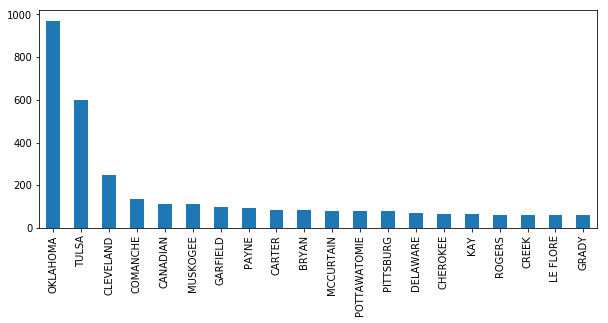

In [8]:
# Total Number of Stores by County
County = FullData.loc[:,'RTL_FIPS_COUNTY_DSC']
County = County.value_counts().head(20)
County.plot.bar(figsize=(10,4))

Total Stores in Kansas  4734
Total Low Point Stores in Kansas  4724
Total Non Low Point Stores in Kansas  10


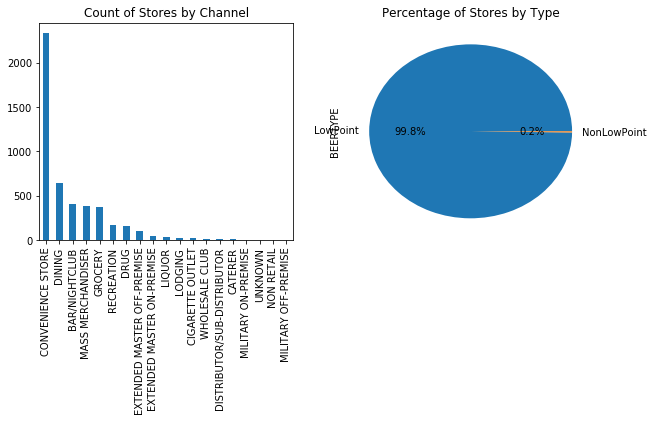

In [9]:
# Total Number Counts of Stores by Trade Channel
Channel = FullData.loc[:,'RTL_CHANNEL_DSC'].value_counts()
Type = FullData.loc[:,'BEERTYPE'].value_counts()

print("Total Stores in Kansas ",len(FullData))
print("Total Low Point Stores in Kansas ",len(FullData.loc[FullData["BEERTYPE"]=="LowPoint",:]))
print("Total Non Low Point Stores in Kansas ",len(FullData.loc[FullData["BEERTYPE"]=="NonLowPoint",:]))

#Plot Channels by Type of Beer
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

Channel.plot(ax=axes[0], kind='bar'); axes[0].set_title('Count of Stores by Channel')
Type.plot(ax=axes[1], kind='pie',autopct='%1.1f%%'); axes[1].set_title('Percentage of Stores by Type')


In [10]:
# Count number of stores per channel
LowPointChannel =FullData.loc[FullData["BEERTYPE"]=="LowPoint",'RTL_CHANNEL_DSC'].value_counts()
NonLowPointChannel =FullData.loc[FullData["BEERTYPE"]=="NonLowPoint",'RTL_CHANNEL_DSC'].value_counts()

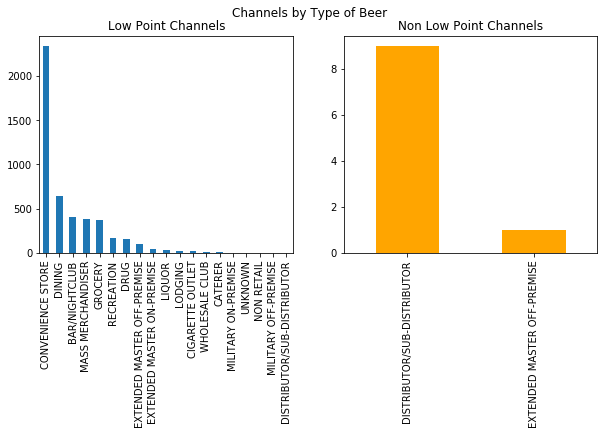

In [11]:
#Plot Channels by Type of Beer
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

LowPointChannel.plot(ax=axes[0], kind='bar'); axes[0].set_title('Low Point Channels')
NonLowPointChannel.plot(ax=axes[1], kind='bar', color = 'orange'); axes[1].set_title('Non Low Point Channels')
fig.suptitle('Channels by Type of Beer')


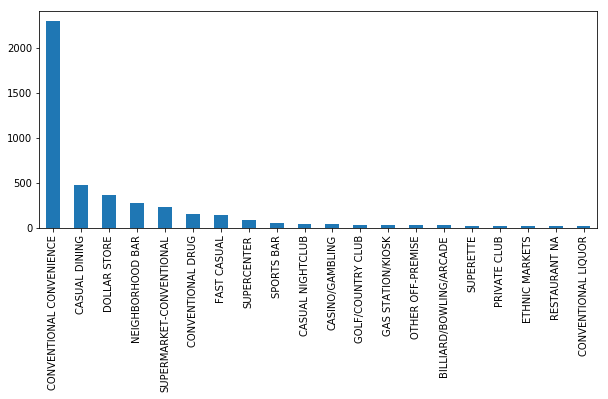

In [12]:
# Total Number of Stores by SubChannel
SubChannel = FullData.loc[:,'RTL_SUBCHANNEL_DSC']
SubChannel = SubChannel.value_counts().head(20)
SubChannel.plot.bar(figsize=(10,4))

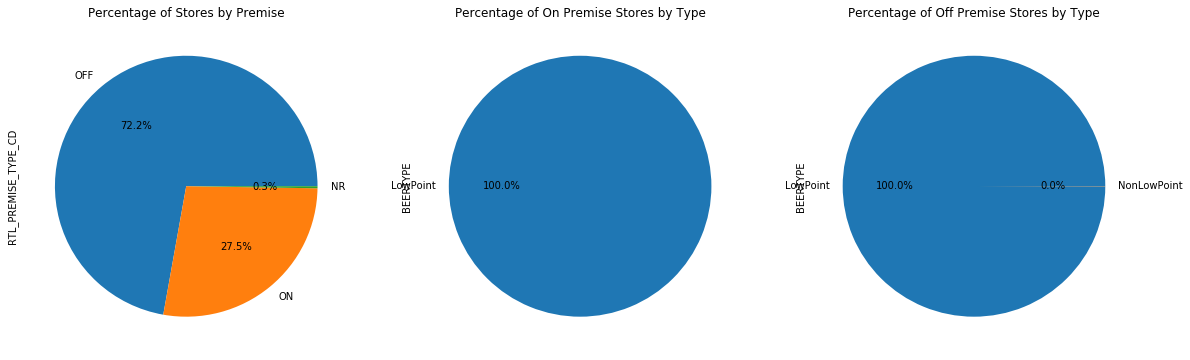

In [13]:
# Percentage of Stores which Off Premise vs On Premise
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

Premise = FullData.loc[:,'RTL_PREMISE_TYPE_CD'].value_counts()
OnPremiseType = FullData.loc[FullData["RTL_PREMISE_TYPE_CD"]=="ON",'BEERTYPE'].value_counts()
OffPremiseType = FullData.loc[FullData["RTL_PREMISE_TYPE_CD"]=="OFF",'BEERTYPE'].value_counts()

Premise.plot(ax=axes[0], kind='pie',autopct='%1.1f%%'); axes[0].set_title('Percentage of Stores by Premise')
OnPremiseType.plot(ax=axes[1], kind='pie',autopct='%1.1f%%'); axes[1].set_title('Percentage of On Premise Stores by Type')
OffPremiseType.plot(ax=axes[2], kind='pie',autopct='%1.1f%%'); axes[2].set_title('Percentage of Off Premise Stores by Type')


### Prepare Data

In [14]:
# prepare data to fit model
X_labels = [c for c in FullData.columns if c not in ['RTL_STORE_CD','BEERTYPE','RTL_FIPS_COUNTY_DSC','RTL_PREMISE_TYPE_CD','RTL_CHANNEL_DSC','RTL_SUBCHANNEL_DSC','RTL_BEER_FLAG',"RTL_LIQUOR_FLG"]]
X = FullData.loc[:,X_labels]
Y = FullData['BEERTYPE']

In [15]:
#try to find the best tree depth with min split.

#tree depth

#Fit a classification tree to the data with various values of the parameters max_depth and min_samples_leaf, 
#Report the cross-validation errors associated with different values of these parameters.

# change the parameter depth and compute test error
TreeDepth = range(1,21)
MinLeaf = range(1,21)
results = []
for d in TreeDepth:
    for l in MinLeaf:
        clf = tree.DecisionTreeClassifier(max_depth=d, min_samples_leaf=l,random_state=0)
        clf = clf.fit(X,Y)    
        scores = cross_val_score(clf, X, Y, cv=5)
        results.append((d,l,scores.mean(), scores.std()))
    
df_tree_accuracy = pd.DataFrame(data=results,columns=['depth','min_sample_leaf','mean','std'])
df_tree_accuracy['depth_leaf']= df_tree_accuracy['depth'].astype(str)+"_"+df_tree_accuracy['min_sample_leaf'].astype(str)

#sort the dataframe
df_tree_accuracy = df_tree_accuracy.sort_values(['mean'], ascending = False)
df_tree_accuracy.head()

,depth,min_sample_leaf,mean,std,depth_leaf
0,1,1,0.999578,0.000517,1_1
207,11,8,0.999578,0.000517,11_8
184,10,5,0.999578,0.000517,10_5
185,10,6,0.999578,0.000517,10_6
186,10,7,0.999578,0.000517,10_7


# Result

In [16]:
#the result: with the best tree depth and accuracy
best_depth = df_tree_accuracy[df_tree_accuracy['mean'] == max(df_tree_accuracy['mean'])]
best_depth = int(best_depth['depth'])

min_leaf = df_tree_accuracy[df_tree_accuracy['mean'] == max(df_tree_accuracy['mean'])]
min_leaf = int(min_leaf['min_sample_leaf'])
print('the best depth is:', best_depth, 'with min split:',min_leaf ,'with accuracy:',round(max(df_tree_accuracy['mean'])*100, 3), '%')



TypeError: cannot convert the series to <class 'int'>

In [ ]:
#check the errors:

#create a new data frame to store the prediction result. 
result_df = FullData.loc[:, 'RTL_STORE_CD': 'BEERTYPE']
result_df['PRED_RESULT'] = clf.predict(X)
result_df.head()

In [ ]:
#check how many stores are predicted wrong; which are they; what characters do they have
error_index_list = []
for index in range(len(result_df)):
    if result_df.ix[index , 'BEERTYPE'] != result_df.ix[index , 'PRED_RESULT']:
        error_index_list.append(index)
print('there are', len(error_index_list), 'errors in the prediction')

In [ ]:
#check the error predictions
error_df = result_df.ix[error_index_list, ]
false_NonLowPoint = error_df.loc[error_df['BEERTYPE'] == 'LowPoint']
print('there are', len(false_NonLowPoint), 'false_NonLowPoint errors.')
false_NonLowPoint.head()

In [ ]:
false_LowPoint = error_df.loc[error_df['BEERTYPE'] == 'NonLowPoint']
print('there are', len(false_LowPoint), 'false_LowPoint errors.')
false_LowPoint.head()

In [ ]:
#create statistics for false_NonLowPoint
county_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_FIPS_COUNTY_DSC'].value_counts().head(15)
premise_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_PREMISE_TYPE_CD'].value_counts()
channel_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_CHANNEL_DSC'].value_counts()
sub_channel_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_SUBCHANNEL_DSC'].value_counts()
beer_license_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_BEER_FLAG'].value_counts()
liquor_license_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_LIQUOR_FLG'].value_counts()

In [ ]:
#create statistics for false_LowPoint
county_false_LowPoint = false_LowPoint.loc[:,'RTL_FIPS_COUNTY_DSC'].value_counts().head(15)
premise_false_LowPoint = false_LowPoint.loc[:,'RTL_PREMISE_TYPE_CD'].value_counts()
channel_false_LowPoint = false_LowPoint.loc[:,'RTL_CHANNEL_DSC'].value_counts()
sub_channel_false_LowPoint = false_LowPoint.loc[:,'RTL_SUBCHANNEL_DSC'].value_counts()
beer_license_false_LowPoint = false_LowPoint.loc[:,'RTL_BEER_FLAG'].value_counts()
liquor_license_false_LowPoint = false_LowPoint.loc[:,'RTL_LIQUOR_FLG'].value_counts()

In [ ]:
#plot for false_NonLowPoint
fig, axes = plt.subplots(nrows=2, ncols=3)

bottom_limit = 1
upper_limit = 1.2

county_false_NonLowPoint.plot(ax=axes[0,0], kind='bar'); axes[0,0].set_title('county')
axes[0,0].set_yticks([bottom_limit*min(county_false_NonLowPoint), int(upper_limit*max(county_false_NonLowPoint))])
   
premise_false_NonLowPoint.plot(ax=axes[0,1], kind='bar'); axes[0,1].set_title('premise type')
axes[0,1].set_yticks([bottom_limit*min(premise_false_NonLowPoint), int(upper_limit*max(premise_false_NonLowPoint))])

channel_false_NonLowPoint.plot(ax=axes[0,2], kind='bar'); axes[0,2].set_title('channel')
axes[0,2].set_yticks([bottom_limit*min(channel_false_NonLowPoint), int(upper_limit*max(channel_false_NonLowPoint))])

sub_channel_false_NonLowPoint.plot(ax=axes[1,0], kind='bar'); axes[1,0].set_title('sub channel')
axes[1,0].set_yticks([bottom_limit*min(sub_channel_false_NonLowPoint), int(upper_limit*max(sub_channel_false_NonLowPoint))])

beer_license_false_NonLowPoint.plot(ax=axes[1,1], kind='bar'); axes[1,1].set_title('beer license')

liquor_license_false_NonLowPoint.plot(ax=axes[1,2], kind='bar'); axes[1,2].set_title('liquor license')

#adjust the plot
plt.subplots_adjust(left=2, bottom=2, right=4, top=3, wspace=0.3, hspace=2)

In [ ]:
#plot for false_LowPoint
fig, axes = plt.subplots(nrows=2, ncols=3)

bottom_limit = 1
upper_limit = 1.2

county_false_LowPoint.plot(ax=axes[0,0], kind='bar'); axes[0,0].set_title('county')
axes[0,0].set_yticks([bottom_limit*min(county_false_NonLowPoint), int(upper_limit*max(county_false_LowPoint))])
   
premise_false_LowPoint.plot(ax=axes[0,1], kind='bar'); axes[0,1].set_title('premise type')
axes[0,1].set_yticks([bottom_limit*min(premise_false_LowPoint), int(upper_limit*max(premise_false_LowPoint))])

channel_false_LowPoint.plot(ax=axes[0,2], kind='bar'); axes[0,2].set_title('channel')
axes[0,2].set_yticks([bottom_limit*min(channel_false_LowPoint), int(upper_limit*max(channel_false_LowPoint))])

sub_channel_false_LowPoint.plot(ax=axes[1,0], kind='bar'); axes[1,0].set_title('sub channel')
axes[1,0].set_yticks([bottom_limit*min(sub_channel_false_LowPoint), int(upper_limit*max(sub_channel_false_LowPoint))])

beer_license_false_LowPoint.plot(ax=axes[1,1], kind='bar'); axes[1,1].set_title('beer license')

liquor_license_false_LowPoint.plot(ax=axes[1,2], kind='bar'); axes[1,2].set_title('liquor license')

#adjust the plot
plt.subplots_adjust(left=2, bottom=2, right=4, top=3, wspace=0.2, hspace=5)


In [ ]:
#feature importance
clf = tree.DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=min_leaf,random_state=0)
clf = clf.fit(X,Y)

#all the features with their importance scores.
feature_score = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending = False)

#only show the features that have scores greater than 0
feature_score[feature_score > 0]


In [ ]:
# Confusion Matrix
cm = confusion_matrix(result_df['BEERTYPE'], result_df['PRED_RESULT'])
cm

In [ ]:
# True Positive Rate
TPR = cm[1,1]/(cm[1,1]+cm[1,0])
TPR

In [ ]:
# False Negative Rate
FNR = cm[1,0]/(cm[1,0]+cm[1,1])
FNR

In [ ]:
# True Negative Rate
TNR = cm[0,0]/(cm[0,0]+cm[0,1])
TNR

In [ ]:
# False Positive Rate
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
FPR